In [4]:
# !pip install optuna -q
# !pip install optuna-integration[sklearn] -q
# !pip install phik -q
# !pip install scikit-learn==1.2.2 imbalanced-learn==0.11.0 -q
# !pip install CatBoost -q
# !pip install lightgbm -q

# !pip install pymystem3 -q

# !pip install torch -q

#!pip install WordCloud -q

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.model_selection import (train_test_split, RandomizedSearchCV,
                                     GridSearchCV, cross_val_score, TimeSeriesSplit)

from sklearn.preprocessing import (OneHotEncoder, LabelEncoder, OrdinalEncoder,
                                   StandardScaler, MinMaxScaler)

from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold  
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier

from sklearn.metrics import (mean_absolute_error, r2_score, mean_squared_error,
                             accuracy_score, roc_auc_score, confusion_matrix,
                             recall_score, precision_score, make_scorer, f1_score)

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import re

import torch
import transformers
from transformers import BertConfig, BertModel
from transformers import AutoTokenizer
from transformers import AutoConfig, AutoModel
from transformers import BertTokenizer 
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords

import tqdm
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


RANDOM_STATE = 42

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Этапы-проекта" data-toc-modified-id="Этапы-проекта-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Этапы проекта</a></span><ul class="toc-item"><li><span><a href="#1.-Загрузка-и-подготовка-данных" data-toc-modified-id="1.-Загрузка-и-подготовка-данных-0.1.1"><span class="toc-item-num">0.1.1&nbsp;&nbsp;</span>1. Загрузка и подготовка данных</a></span></li><li><span><a href="#2.-Анализ-данных" data-toc-modified-id="2.-Анализ-данных-0.1.2"><span class="toc-item-num">0.1.2&nbsp;&nbsp;</span>2. Анализ данных</a></span></li><li><span><a href="#3.-Подготовка-признаков" data-toc-modified-id="3.-Подготовка-признаков-0.1.3"><span class="toc-item-num">0.1.3&nbsp;&nbsp;</span>3. Подготовка признаков</a></span></li><li><span><a href="#4.-Обучение-моделей" data-toc-modified-id="4.-Обучение-моделей-0.1.4"><span class="toc-item-num">0.1.4&nbsp;&nbsp;</span>4. Обучение моделей</a></span></li><li><span><a href="#6.-Оценка-и-сравнение-моделей" data-toc-modified-id="6.-Оценка-и-сравнение-моделей-0.1.5"><span class="toc-item-num">0.1.5&nbsp;&nbsp;</span>6. Оценка и сравнение моделей</a></span></li><li><span><a href="#7.-Выводы-и-рекомендации" data-toc-modified-id="7.-Выводы-и-рекомендации-0.1.6"><span class="toc-item-num">0.1.6&nbsp;&nbsp;</span>7. Выводы и рекомендации</a></span></li></ul></li></ul></li><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Распределение-классов" data-toc-modified-id="Распределение-классов-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Распределение классов</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Облако-слов" data-toc-modified-id="Облако-слов-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Облако слов</a></span></li><li><span><a href="#Обработка-данных" data-toc-modified-id="Обработка-данных-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Обработка данных</a></span></li><li><span><a href="#Подготовка-данных-для-моделей" data-toc-modified-id="Подготовка-данных-для-моделей-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Подготовка данных для моделей</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Подбор-гиперпараметров" data-toc-modified-id="Подбор-гиперпараметров-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Подбор гиперпараметров</a></span></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Тестирование</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

# Проект для «Викишоп» c BERT

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75. 

**Инструкция по выполнению проекта**

1. Загрузите и подготовьте данные.
2. Обучите разные модели. 
3. Сделайте выводы.

Для выполнения проекта применять *BERT* необязательно, но вы можете попробовать.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

### Этапы проекта

#### 1. Загрузка и подготовка данных

#### 2. Анализ данных

#### 3. Подготовка признаков

#### 4. Обучение моделей

#### 6. Оценка и сравнение моделей

#### 7. Выводы и рекомендации

## Подготовка

### Загрузка данных

In [6]:
df = pd.read_csv('toxic_comments.csv', index_col = 0)

In [7]:
df = df.sample(3000, random_state=42)  # перемешиваем данные перед выборкой
df.head()

,text,toxic
31055,"Sometime back, I just happened to log on to ww...",0
102929,"""\n\nThe latest edit is much better, don't mak...",0
67385,""" October 2007 (UTC)\n\nI would think you'd be...",0
81167,Thanks for the tip on the currency translation...,0
90182,I would argue that if content on the Con in co...,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3000 entries, 31055 to 153378
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    3000 non-null   object
 1   toxic   3000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 70.3+ KB


#### Вывод

Данные содержат лишние и ненужные символы

Т.к данных слишком много то возьмем только часть из них

### Распределение классов

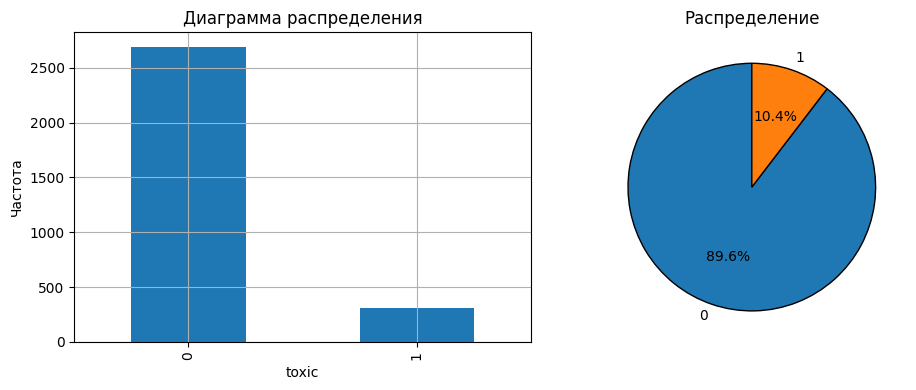

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
df.toxic.value_counts().plot.bar(ax=axes[0])
axes[0].set_title(f'Диаграмма распределения', fontsize=12)
axes[0].grid(True)
axes[0].set_ylabel('Частота')
axes[0].tick_params(axis='x', rotation=90)
df.toxic.value_counts().plot.pie(
    autopct='%1.1f%%', 
    startangle=90, 
    wedgeprops={'edgecolor': 'black', 'linewidth': 1},
    ax=axes[1]
)
axes[1].set_title(f'Распределение', fontsize=12)
axes[1].set_ylabel('')
plt.tight_layout()
plt.show()

#### Вывод

Заметич, что данные имеют дисбаланс классов и необходимо использовть кросс валидацию и стратификацию

### Облако слов

In [10]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Павел\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
toxic_text = " ".join(df[df['toxic'] == 1]['text'].astype(str))
non_toxic_text = " ".join(df[df['toxic'] == 0]['text'].astype(str))

In [12]:
wordcloud_toxic = WordCloud(width=800, height=400, background_color='black', stopwords=stop_words).generate(toxic_text)
wordcloud_non_toxic = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(non_toxic_text)

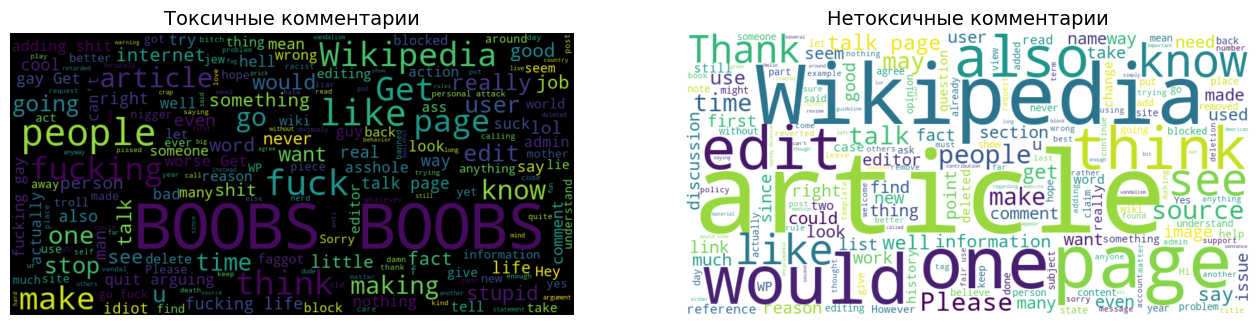

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].imshow(wordcloud_toxic, interpolation='bilinear')
axes[0].set_title("Токсичные комментарии", fontsize=14)
axes[0].axis("off")

axes[1].imshow(wordcloud_non_toxic, interpolation='bilinear')
axes[1].set_title("Нетоксичные комментарии", fontsize=14)
axes[1].axis("off")

plt.show()

1. Токсичные комментарии:

* Чётко прослеживается наличие бранной и оскорбительной лексики — такие слова, как fucking, fuck, idiot, boobs, stupid 

* Часто упоминаются агрессивные выражения и личные нападки (you, life, gay, job, stop), что соответствует сути токсичных высказываний


2. Нетоксичные комментарии:

* Преобладают нейтральные и конструктивные слова, такие как article, edit, information, thank, please

* Тематика комментариев связана с редактированием и обсуждением контента Википедии

* Часто встречаются вежливые формулировки и обращения: would, please, think, see, help.

### Обработка данных

In [14]:
# Поиск дубликатов
df.duplicated().sum()

0

In [15]:
corpus = df['text']

In [16]:
# СОздадим функцию для очистки текстов от лишних символов
def clear_text(text):
    text = re.sub(r'[^a-zA-Z ]', ' ', text)
    
    return " ".join(text.split()).lower()

In [17]:
# Очистим текст от ненужных символов и пиведем к нижнему регистру
new_corpus = corpus.apply(clear_text)
new_corpus.head()

31055     sometime back i just happened to log on to www...
102929    the latest edit is much better don t make this...
67385     october utc i would think you d be able to get...
81167     thanks for the tip on the currency translation...
90182     i would argue that if content on the con in co...
Name: text, dtype: object

### Подготовка данных для моделей

In [18]:
%%time
#Токенизация корпуса текстов
tokenizer = transformers.AutoTokenizer.from_pretrained('unitary/toxic-bert')

tokenized = new_corpus.apply(
    lambda x: tokenizer.encode(x, add_special_tokens=True, max_length=512, truncation=True))

max_len = 0
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)

padded = np.array([i + [0]*(max_len - len(i)) for i in tokenized.values])

attention_mask = np.where(padded != 0, 1, 0)

CPU times: total: 875 ms
Wall time: 1.4 s


In [19]:
# Загружаем BERT 
model = transformers.AutoModel.from_pretrained('unitary/toxic-bert')

In [20]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [21]:
model.to(device)
padded = torch.tensor(padded).to(device)
attention_mask = torch.tensor(attention_mask).to(device)

In [22]:
%%time
# Создаем эмбеддинги
batch_size = 100
embeddings = []

for i in tqdm.notebook.tqdm(range(padded.shape[0] // batch_size)):
    batch = padded[batch_size * i: batch_size * (i + 1)] 
    attention_mask_batch = attention_mask[batch_size * i: batch_size * (i + 1)]  

    with torch.no_grad():
        batch_embeddings = model(batch, attention_mask=attention_mask_batch)

    embeddings.append(batch_embeddings[0][:, 0, :].cpu().numpy())  # Переводим на CPU 

features = np.concatenate(embeddings)

  0%|          | 0/30 [00:00<?, ?it/s]

CPU times: total: 1min 23s
Wall time: 1min 23s


In [23]:
features.shape

(3000, 768)

In [24]:
y = df.toxic
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.25, random_state=42, stratify=y)

#### Вывод

Данные очищены 

Получены эмбеддинги на основе модели 'toxic-bert'

## Обучение

In [25]:
# Определяем модели
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(kernel='linear', probability=True), 
    "CatBoost": CatBoostClassifier(iterations=100, learning_rate=0.1, verbose=0, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(weights='distance')
}

In [26]:
# Кросс-валидация
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = {}
models_trained = []
for name, model in models.items():
    print(f"Training {name}...")
    f1_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='f1')
    models_trained.append(model)
    results[name] = {
        "Mean F1 CV": f1_scores.mean(),
    }
    
    print(f"{name}: Mean F1 CV = {f1_scores.mean():.4f}\n")

Training Logistic Regression...
Logistic Regression: Mean F1 CV = 0.8983

Training Random Forest...
Random Forest: Mean F1 CV = 0.9126

Training SVM...
SVM: Mean F1 CV = 0.8754

Training CatBoost...
CatBoost: Mean F1 CV = 0.9007

Training Decision Tree...
Decision Tree: Mean F1 CV = 0.8695

Training KNN...
KNN: Mean F1 CV = 0.8970



In [27]:
results_df = pd.DataFrame(results).T
print(results_df)

                     Mean F1 CV
Logistic Regression    0.898299
Random Forest          0.912597
SVM                    0.875394
CatBoost               0.900657
Decision Tree          0.869469
KNN                    0.897013


### Подбор гиперпараметров

In [28]:
# --- Лучше оказался Случайный Лес

#Лучшей моделью себя показала Logistic Regression именно поэтому мы бдуем улучшать ее

In [29]:
# params = np.arange(1, 3.1, 0.1).tolist()
# param_grid = {
#     "C": params
# }

In [30]:
# log_reg = LogisticRegression(max_iter=1000)
# grid_search = GridSearchCV(log_reg, param_grid, cv=kf, scoring="f1", n_jobs=-1)

# # Запуск поиска
# grid_search.fit(X_train, y_train)

In [31]:
# cv_results_df = pd.DataFrame(grid_search.cv_results_)
# cv_results_df_sorted = cv_results_df.sort_values(by='rank_test_score')

# # Выводим отсортированные результаты
# display(cv_results_df_sorted)
# print("Лучшие параметры:", grid_search.best_params_)

In [32]:
param_dist = {
    'n_estimators': np.arange(100, 501, 100),
    'max_depth': [20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [33]:
%%time
rf = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(
    rf, param_distributions=param_dist, n_iter=20, 
    cv=5, scoring='f1', n_jobs=-1, verbose=1, random_state=42
)

# Обучаем на данных
random_search.fit(features, y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
CPU times: total: 16.2 s
Wall time: 3min 5s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': array([100, 200, 300, 400, 500])},
                   random_state=42, scoring='f1', verbose=1)

In [34]:
# Выводим лучшие параметры
print("Лучшие параметры:", random_search.best_params_)
print("Лучший F1-score на кросс-валидации:", random_search.best_score_)

Лучшие параметры: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 20}
Лучший F1-score на кросс-валидации: 0.9218307254164824


Заметим, что подбор гиперпараметров улучшил качество модели

### Тестирование

In [36]:
# Оценка на тесте
# best_model = LogisticRegression(max_iter=1000)

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
f1 = f1_score(y_test, y_pred)
print("F1-score на тесте:", f1)

F1-score на тесте: 0.9935483870967742


## Выводы

1. **Загрузка и подготовка данных**:
   - Данные были успешно загружены и подготовлены, включая очистку текста от ненужных символов и приведение его к нижнему регистру
   - Для очистки текста использовалась регулярная выразительность для удаления ненужных символов

2. **Анализ данных**:
   - В процессе анализа данных было замечено, что в наборе данных имеется значительный дисбаланс классов

3. **Особенности токсичных и нетоксичных комментариев**:
   - Для улучшения понимания содержания комментариев было использовано облако слов. Токсичные комментарии характеризуются агрессивной лексикой и личными оскорблениями, такими как "fucking", "stupid", "idiot", в то время как нетоксичные комментарии чаще используют конструктивные фразы, связанные с редактированием и улучшением контента

4. **Модели и обучение**:
   - Было обучено несколько моделей. Среди них **Random Forest** показала наилучший результат по метрике F1 (0.9126) на кросс-валидации..

5. **Подбор гиперпараметров**:
   - Для улучшения качества модели был выполнен подбор гиперпараметров для **Random Forest** с использованием **RandomizedSearchCV**, что позволило повысить метрику F1 до 0.9218 на кросс-валидации.
   - Подбор гиперпараметров значительно улучшил результаты модели, что подтверждается тестовым F1-скорем 0.9935 на финальной модели.

6. **Тестирование и оценка**:
   - Тестирование на отдельной тестовой выборке показало высокий результат (F1 = 0.9935), что подтверждает способность модели эффективно классифицировать токсичные и нетоксичные комментарии.